In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.dates as mdates

In [106]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [107]:
df = pd.read_csv("/home/helfs/personal/spotify/data/all_radiohead_songs.csv")

In [108]:
df.dtypes

album_type                 object
external_urls              object
href                       object
album_id                   object
images                     object
album_name                 object
release_date               object
release_date_precision     object
total_tracks                int64
type_album                 object
track_id                   object
track_name                 object
acousticness              float64
analysis_url               object
danceability              float64
duration_ms                 int64
energy                    float64
instrumentalness          float64
key                         int64
liveness                  float64
loudness                  float64
mode                        int64
speechiness               float64
tempo                     float64
time_signature              int64
track_href                 object
type_track_features        object
valence                   float64
dtype: object

In [140]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'] = df['release_date'].dt.strftime("%Y")
df['duration_mins'] = df['duration_ms'] / 60000

# Mean album length

In [141]:
df_duracoes = df.groupby(['album_name', 'release_date'])['duration_mins'].mean()
df_duracoes = df_duracoes.reset_index()
df_duracoes

,album_name,release_date,duration_mins
0,A Moon Shaped Pool,2016,4.783798
1,Amnesiac,2001,3.995959
2,Hail To the Thief,2003,4.042619
3,I Might Be Wrong,2001,5.046027
4,In Rainbows,2007,4.264367
5,In Rainbows (Disk 2),2007,3.356017
6,Kid A,2000,4.290309
7,OK Computer,1997,4.473925
8,OK Computer OKNOTOK 1997 2017,2017,4.027120
9,Pablo Honey,1993,3.521167


## Mean album lengths throughout the years

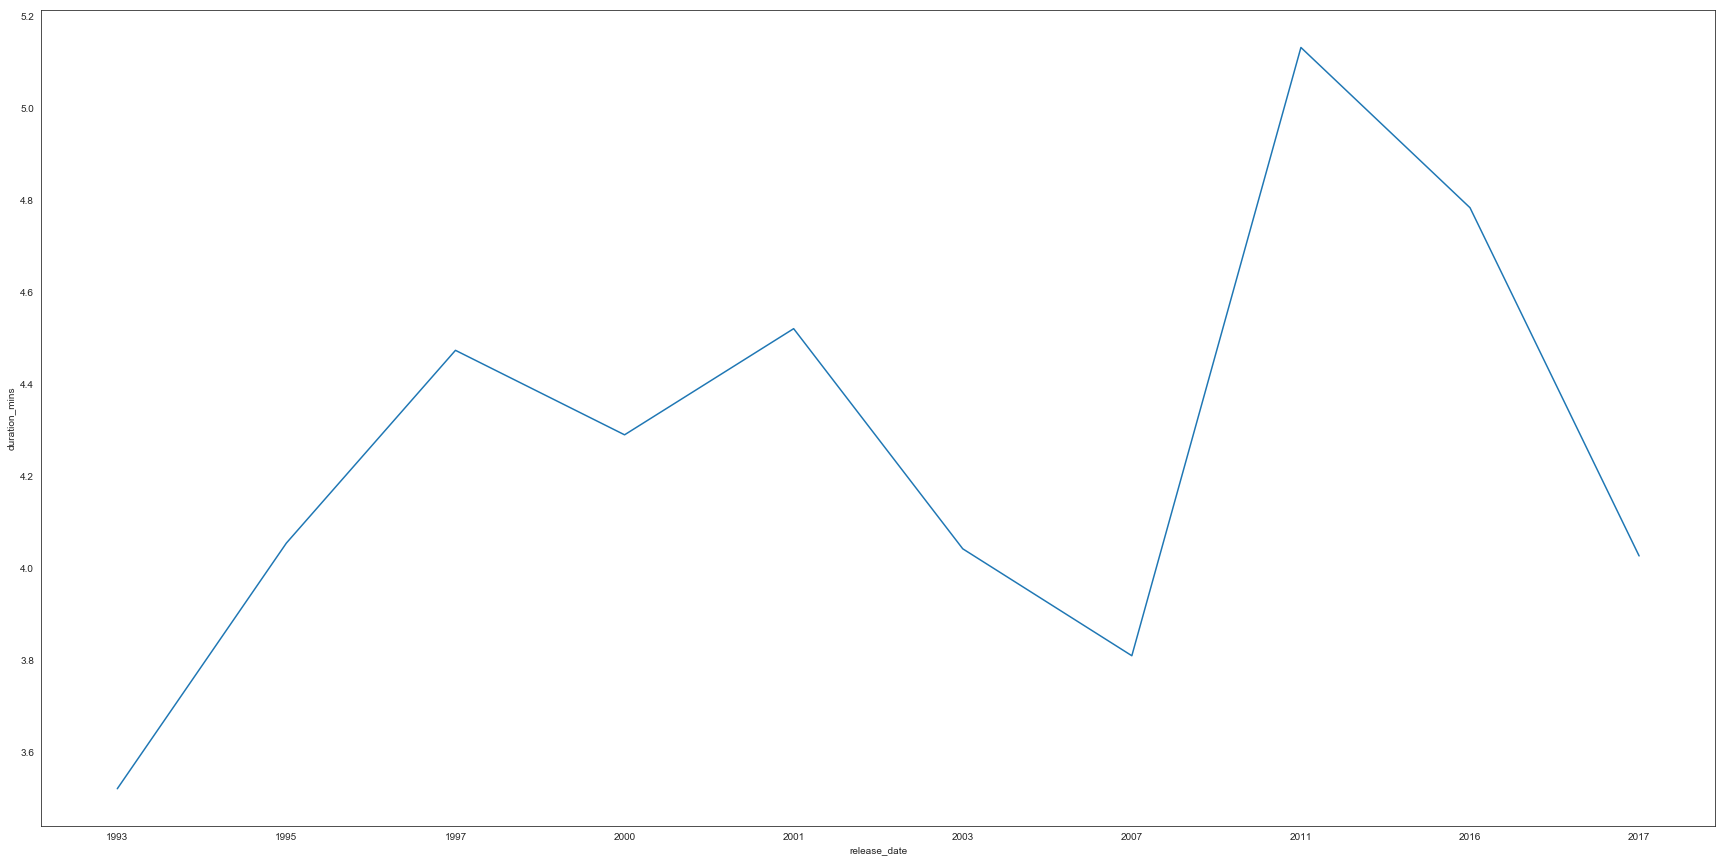

In [143]:
plt.figure(figsize=(30,15))
sns.lineplot(data=df_duracoes, x='release_date', y='duration_mins', ci=None)

In [144]:
studio_albums = ['A Moon Shaped Pool',
 'Amnesiac',
 'Hail To the Thief',
 'In Rainbows',
 'Kid A',
 'OK Computer',
 'Pablo Honey',
 'The Bends',
 'The King Of Limbs']

In [145]:
condition = df.album_name.isin(studio_albums)
filtered_df = df[condition]

## Mean studio album lengths throughout the years

Considering here the first release of each album.

Text(0.5, 1.0, 'Radiohead album mean duration')

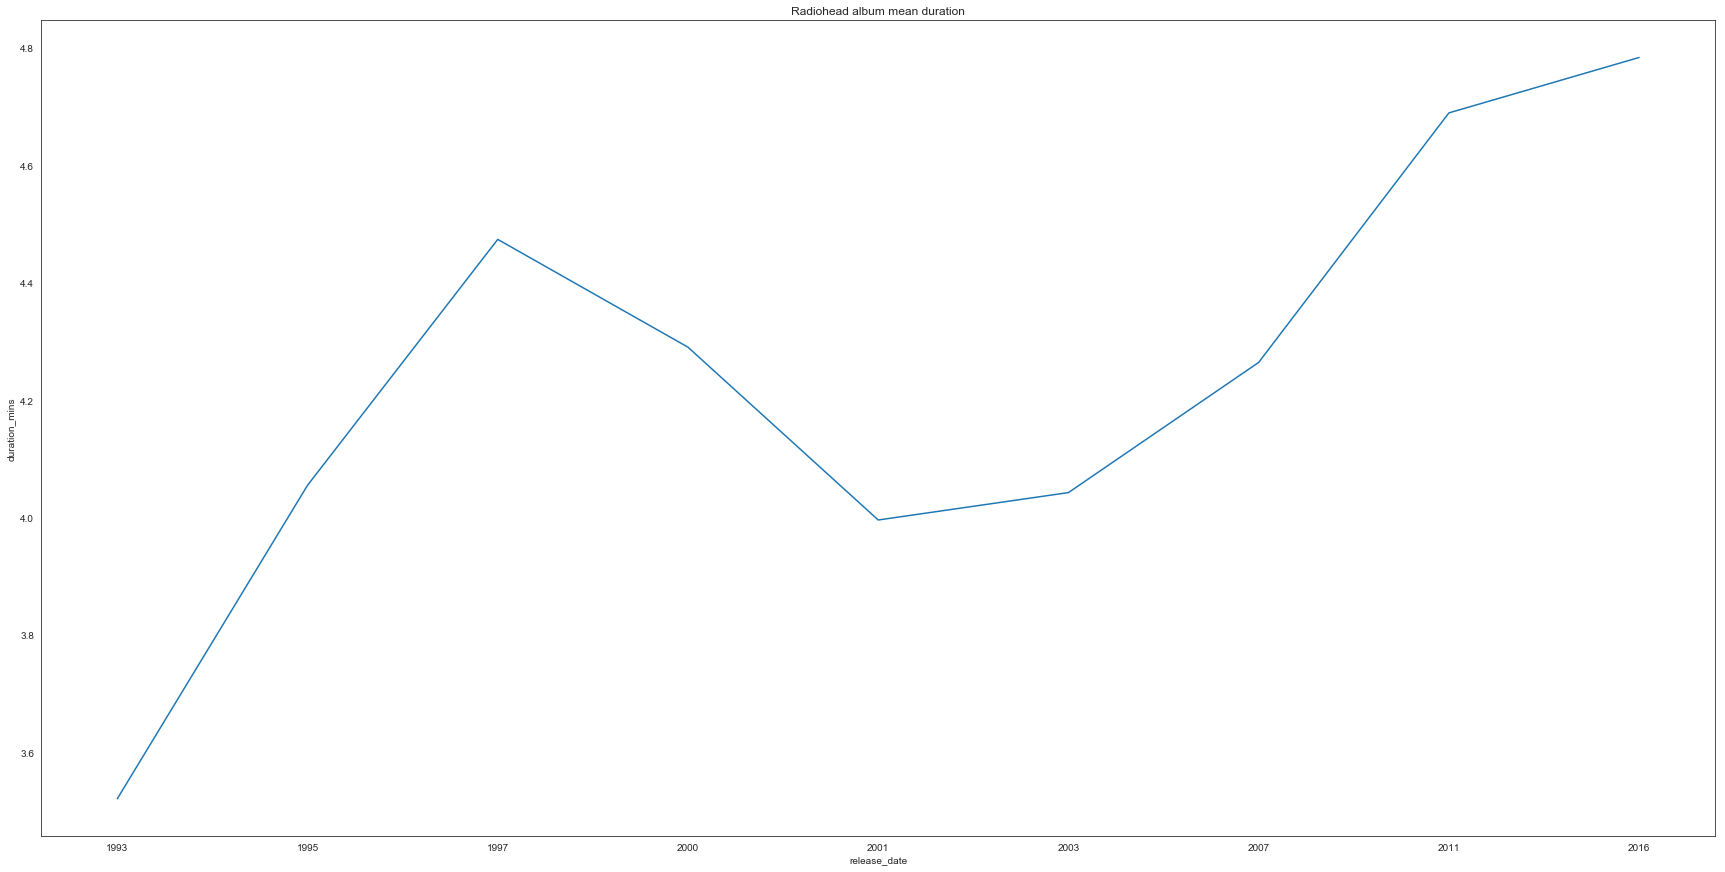

In [146]:
plt.figure(figsize=(30,15))
sns.lineplot(data=filtered_df, x='release_date', y='duration_mins', ci=None).set_title('Radiohead album mean duration')

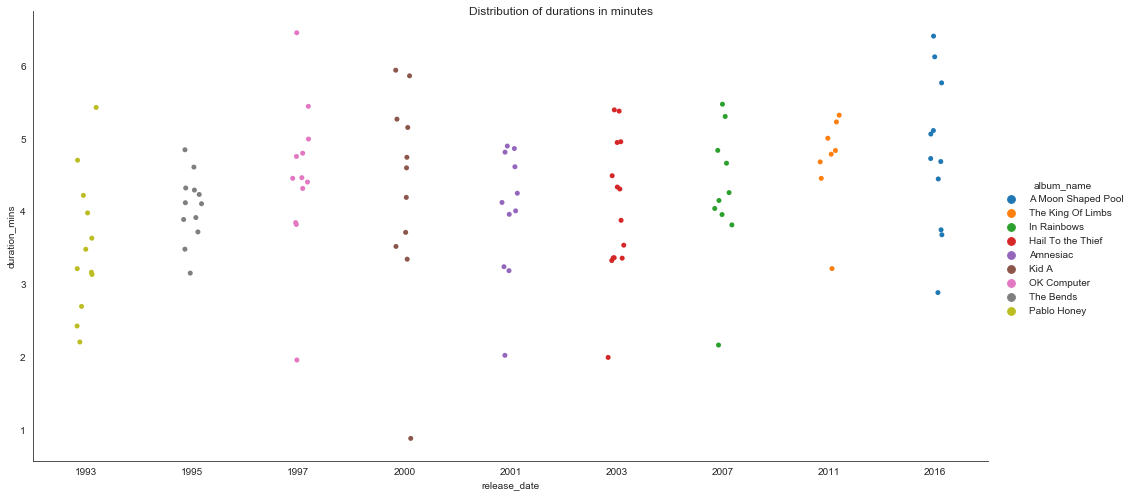

In [152]:
# build the figure
sns.catplot(x="release_date", y="duration_mins", hue='album_name', data=filtered_df,  height=7, aspect=2)
plt.suptitle('Distribution of durations in minutes')
plt.show()

# Discography audio features

Distribution of the features throughout the discography, the reference can be found on the link below:

https://developer.spotify.com/documentation/web-api/reference/object-model/#audio-features-object

In [168]:
desired_columns = ['acousticness', 'danceability', 'instrumentalness', 'energy', 'speechiness', 'album_name']

df_plot = filtered_df[desired_columns]

def plot_features(df, album_title, kde=True):
    acoustic_features = ['acousticness', 'danceability', 'instrumentalness', 'energy', 'speechiness']
    sns.set_style('white')
    fig, axes = plt.subplots(1,5, figsize=(25,5))
    fig.suptitle(album_title, fontsize="x-large")
    for i, feature in enumerate(acoustic_features):
        sns.distplot(df[feature], ax=axes[i], bins=10, kde=kde)
    sns.despine()
    plt.show()

## The feature distribution considering the whole discography

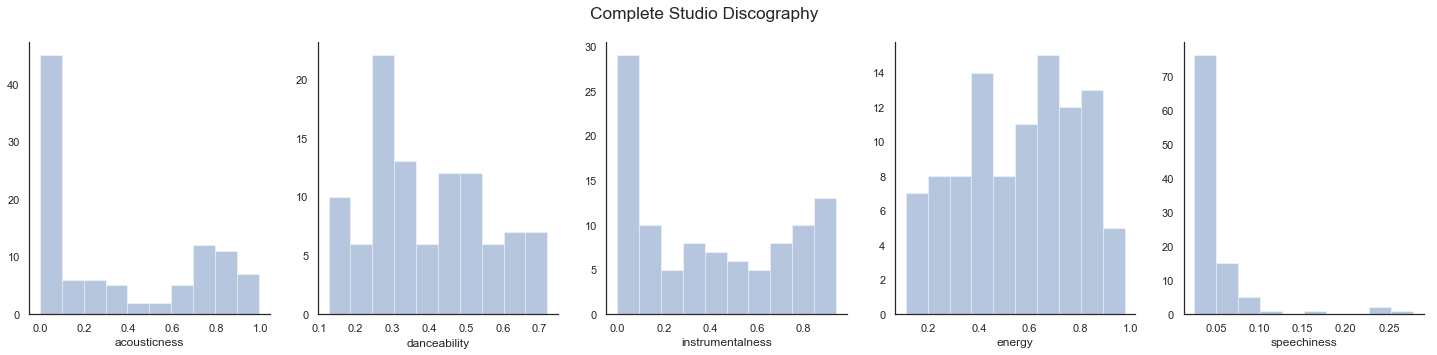

In [170]:
plot_features(df_plot, 'Complete Studio Discography', kde=False)

## The feature distribution for each studio album

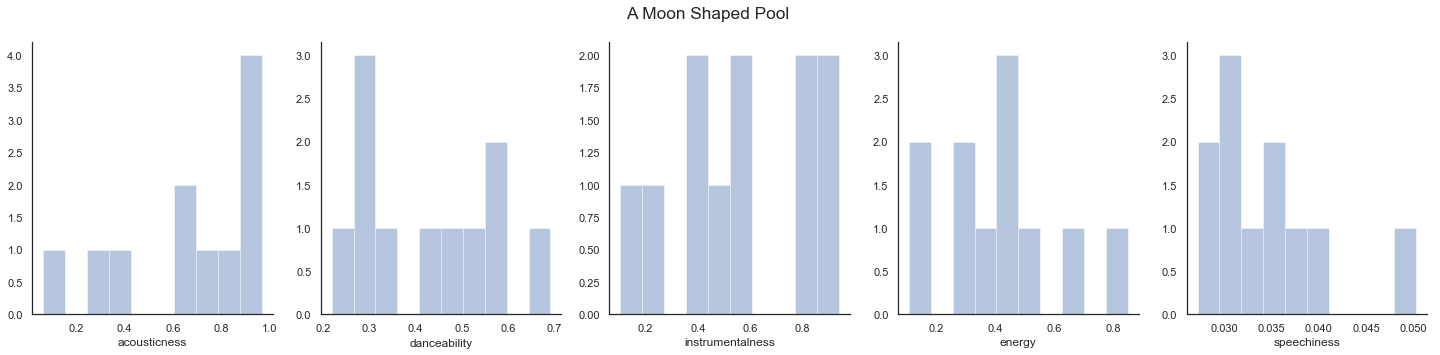

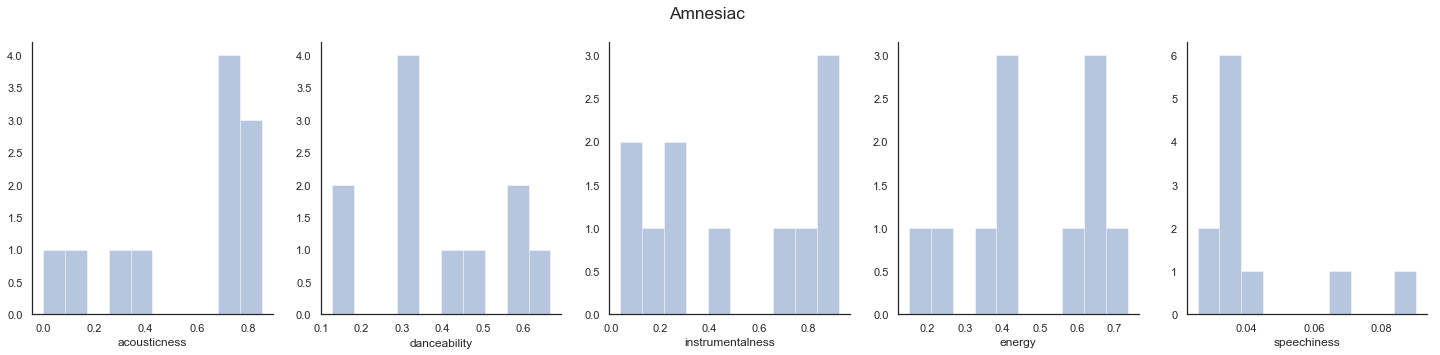

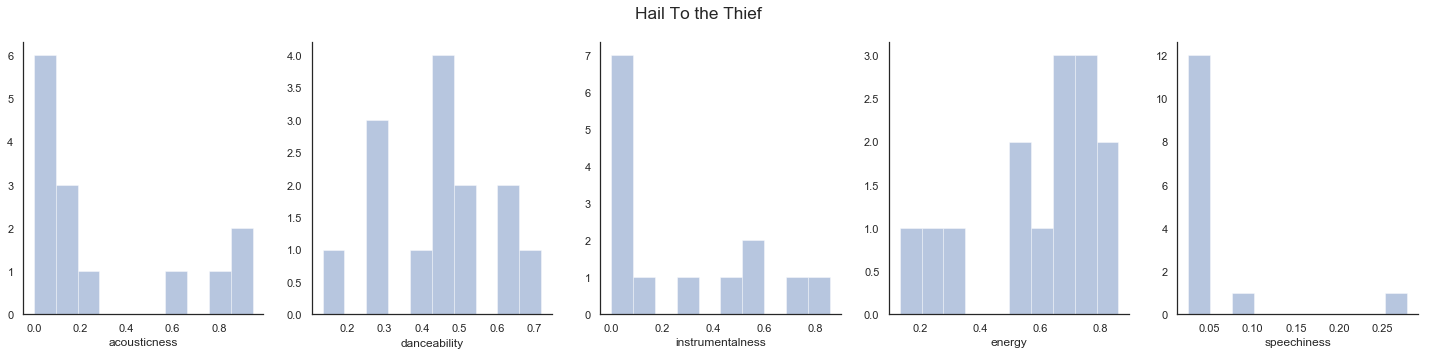

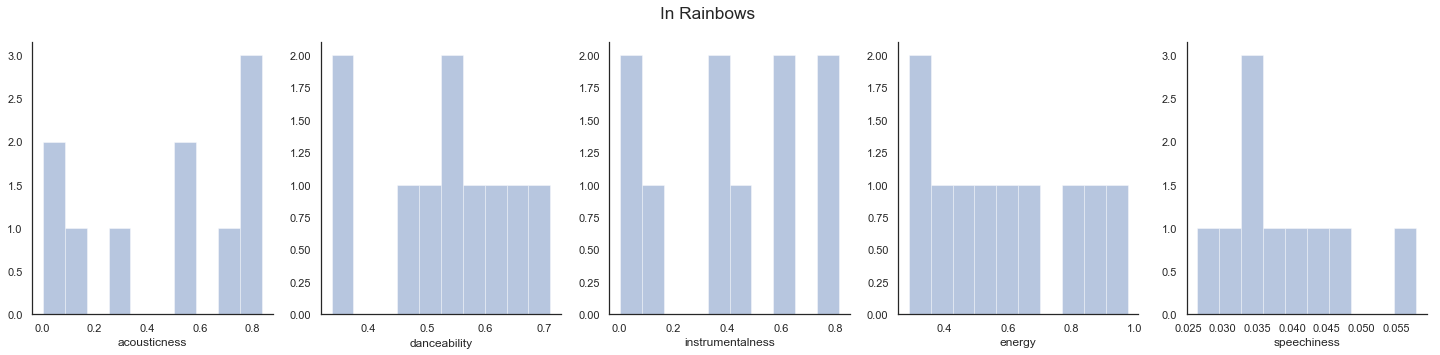

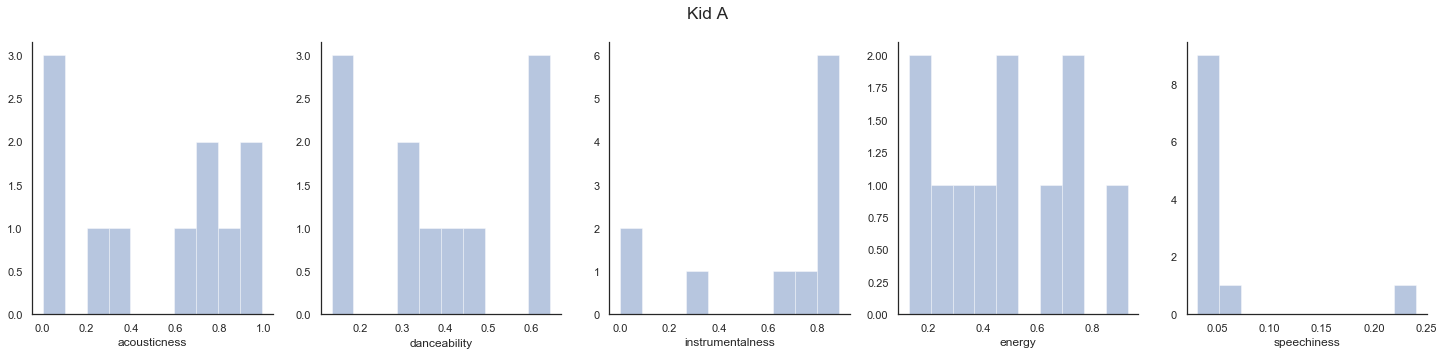

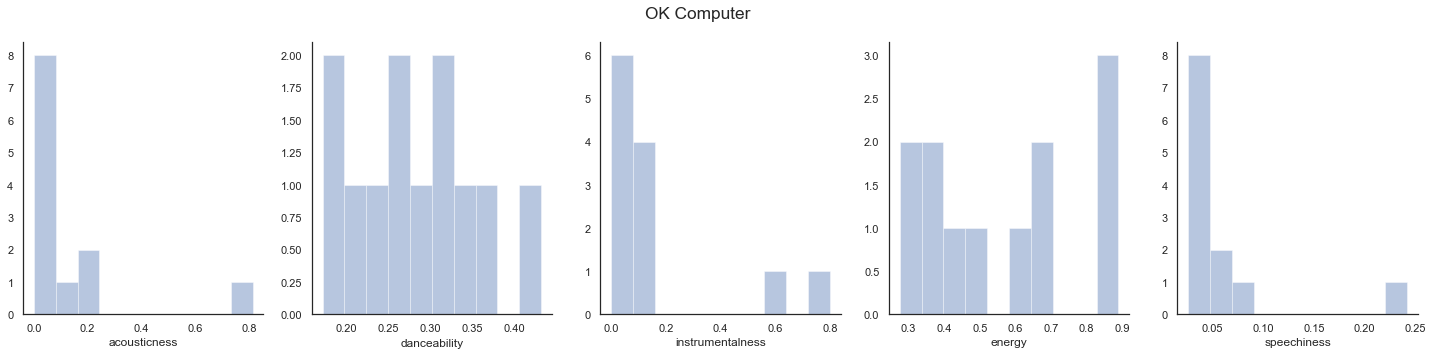

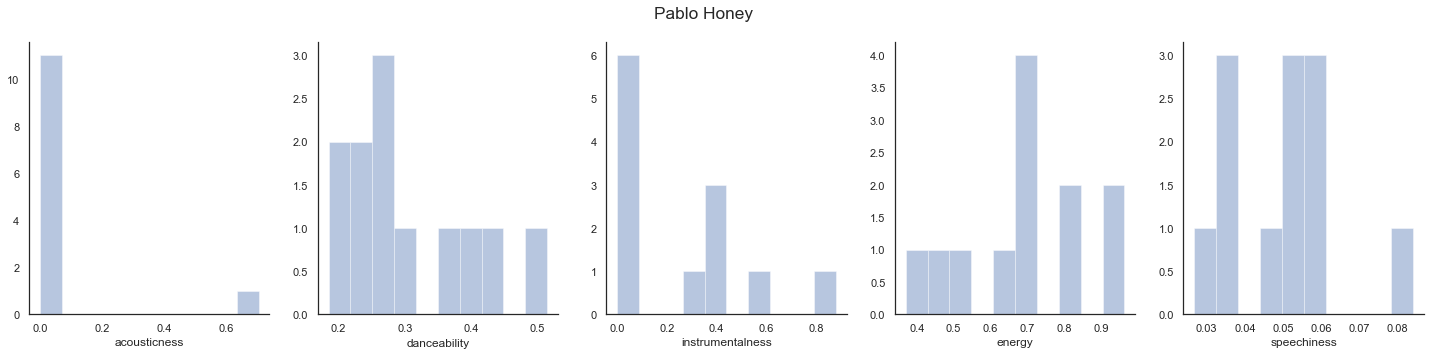

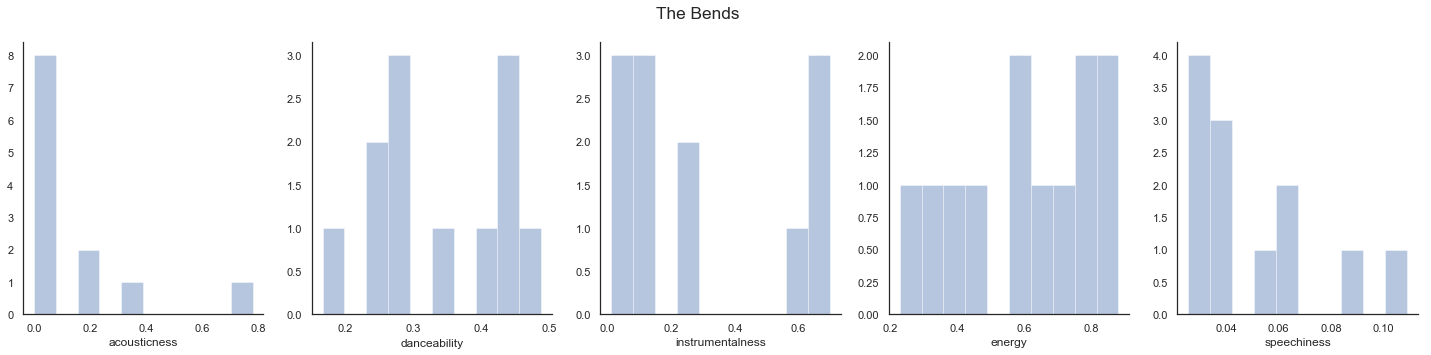

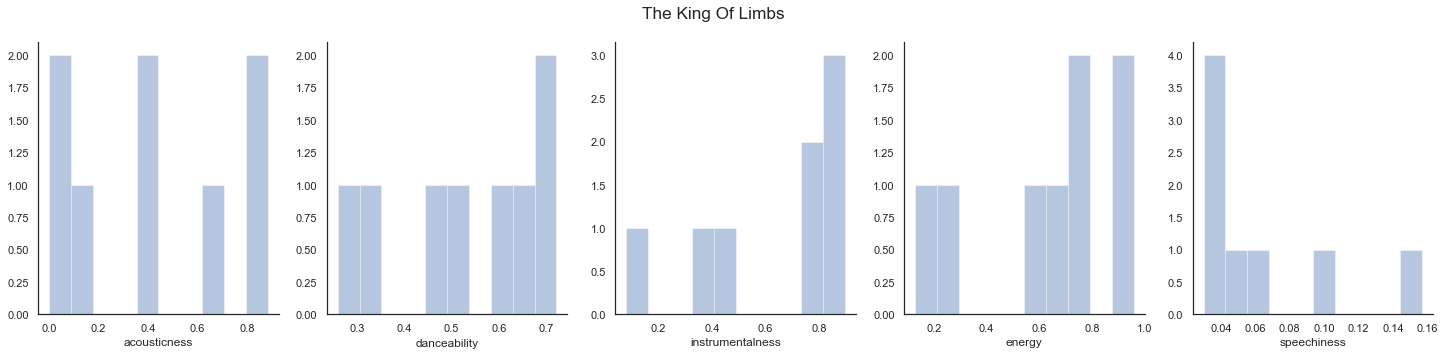

In [169]:
for album in studio_albums:
    test_df = df[df.album_name == album]
    plot_features(test_df, album, kde=False)

## The same information, but with more details

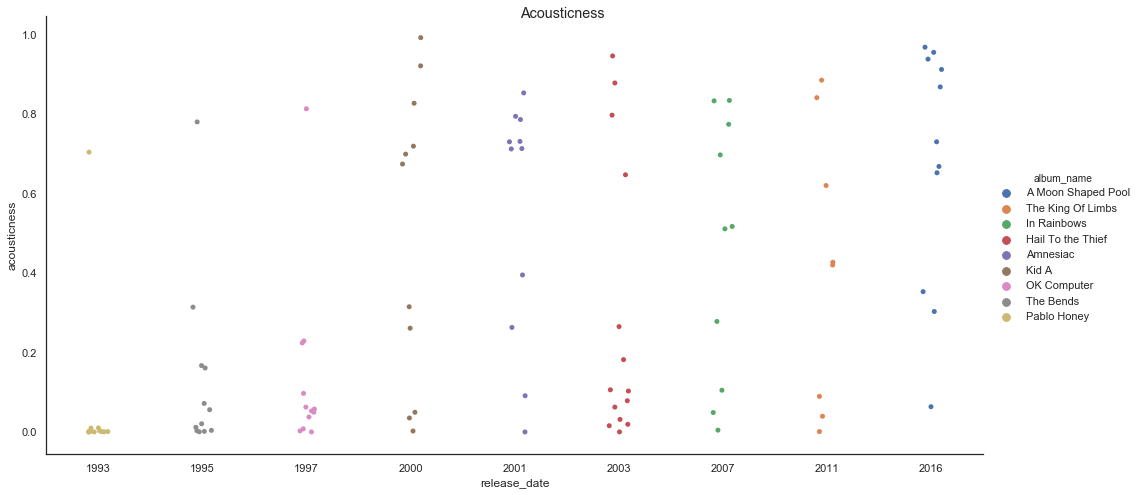

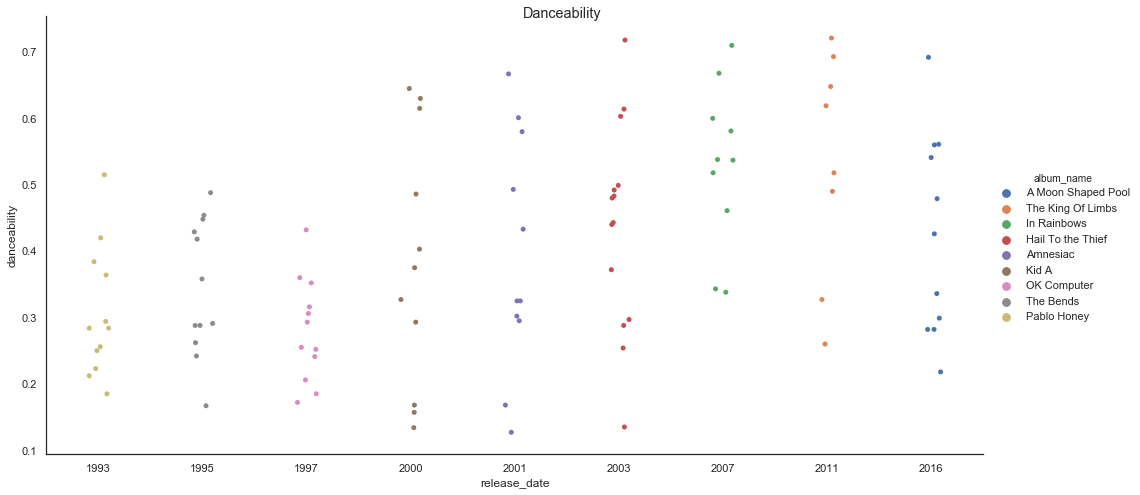

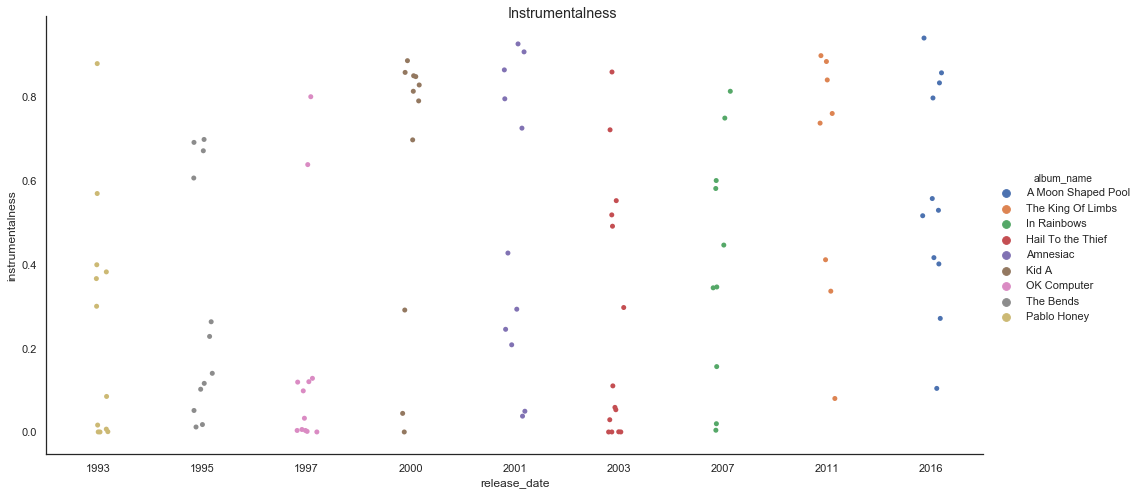

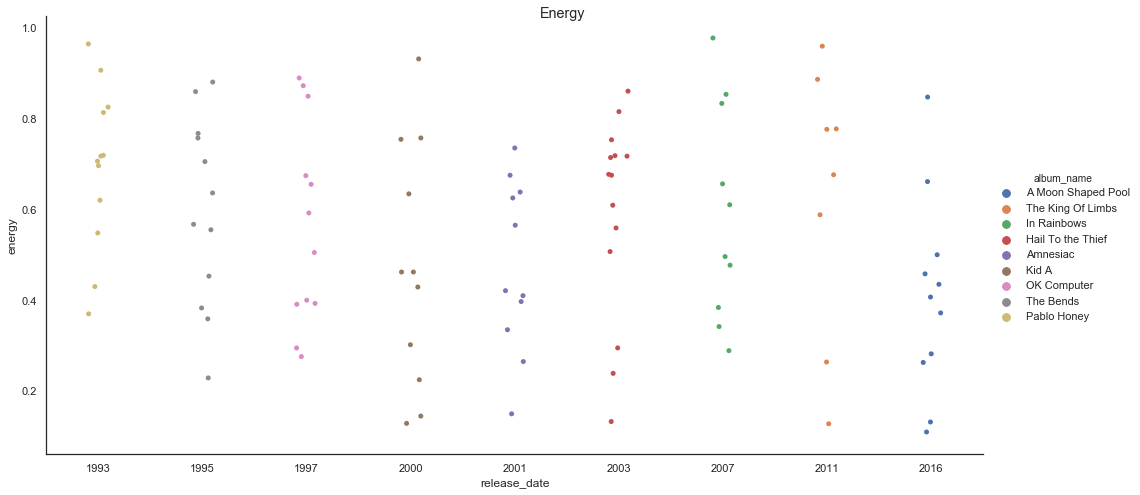

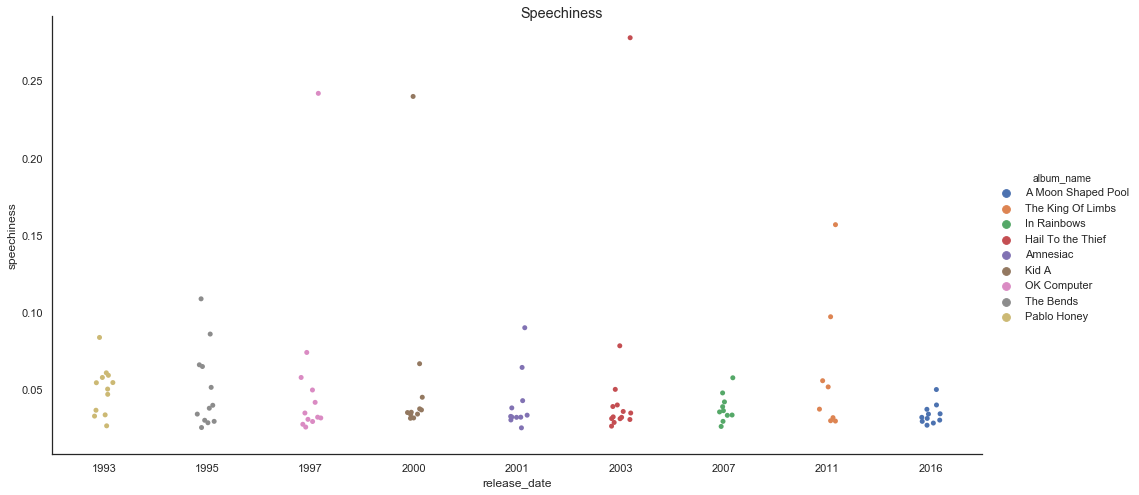

In [166]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')

acoustic_features = ['acousticness', 'danceability', 'instrumentalness', 'energy', 'speechiness']

for feature in acoustic_features:
    sns.catplot(x="release_date", y=feature, hue='album_name', data=filtered_df,  height=7, aspect=2)
#     sns.scatterplot(x="release_date", y=feature, hue='album_name', data=filtered_df)
#     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.suptitle(feature.capitalize())
    plt.show()

# Taking a better look at some features

First of all we write some helper functions to handle this problem.

In [251]:
def get_n_most_from_feature_by_album(number_of_tracks, feature_name):
    return filtered_df.groupby(['album_name'])['track_name', feature_name].apply(lambda x: x.nlargest(number_of_tracks, columns=[feature_name]))


def get_n_tracks_from_feature(n_values, feature, ascending=False):
    return filtered_df[['album_name','track_name',feature]].sort_values(feature, ascending=ascending)[:n_values].reset_index(drop=True)


## Acousticness

**Acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**Acoustic music**: the music that solely or primarily uses instruments that produce sound through acoustic means, as opposed to electric or electronic means; typically the phrase refers to that made by acoustic string instruments.

Lets take a look at the top 3 acoustic tracks from each studio album.

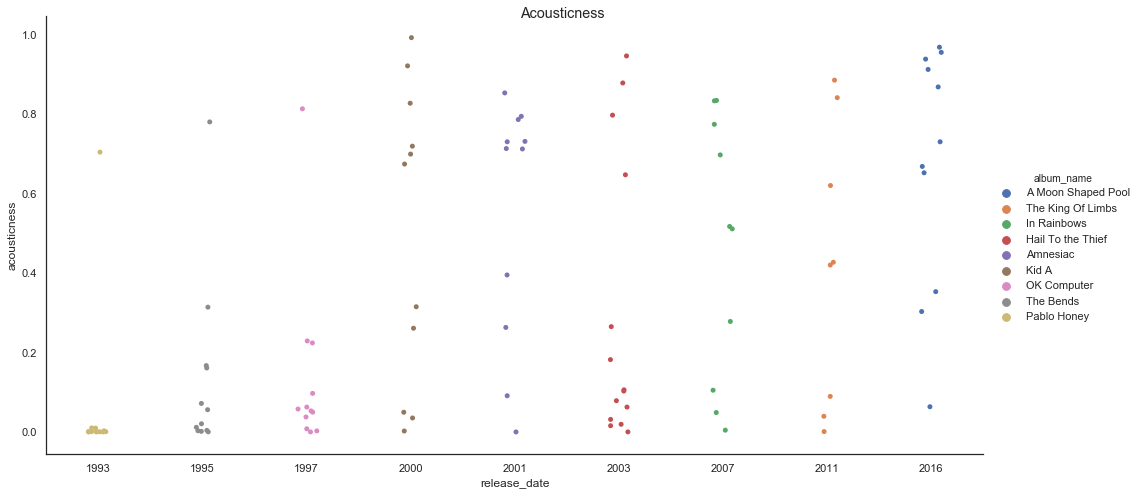

In [252]:
feature = 'acousticness'
sns.catplot(x="release_date", y=feature, hue='album_name', data=filtered_df,  height=7, aspect=2)
plt.suptitle(feature.capitalize())
plt.show()

In [253]:
get_n_most_from_feature_by_album(2, feature)

track_name  acousticness
album_name                                                         
A Moon Shaped Pool 24                     Daydreaming        0.9680
                   28                      Glass Eyes        0.9550
Amnesiac           101                  Hunting Bears        0.8530
                   96             You And Whose Army?        0.7940
Hail To the Thief  88                          I Will        0.9460
                   85             We Suck Young Blood        0.8780
In Rainbows        66                       Faust Arp        0.8340
                   63                            Nude        0.8330
Kid A              122                       Untitled        0.9920
                   121      Motion Picture Soundtrack        0.9210
OK Computer        129                 Fitter Happier        0.8130
                   126        Exit Music (For a Film)        0.2290
Pablo Honey        151             Thinking About You        0.7040
                   148                          Creep        0.0102
The Bends          143  Bullet Proof ... I Wish I Was        0.7800
                   146       Street Spirit (Fade Out)        0.3140
The King Of Limbs  59               Give Up The Ghost        0.8850
                   58                           Codex        0.8410

In some cases, the feature measure does not make really a lot of sense, like in the Kid A tracks. 

Well, Kid A has not a _common_ sound. And every music has a lot of electric components to it.

In [254]:
get_n_tracks_from_feature(10, feature)

,album_name,track_name,acousticness
0,Kid A,Untitled,0.992
1,A Moon Shaped Pool,Daydreaming,0.968
2,A Moon Shaped Pool,Glass Eyes,0.955
3,Hail To the Thief,I Will,0.946
4,A Moon Shaped Pool,True Love Waits,0.938
5,Kid A,Motion Picture Soundtrack,0.921
6,A Moon Shaped Pool,Present Tense,0.912
7,The King Of Limbs,Give Up The Ghost,0.885
8,Hail To the Thief,We Suck Young Blood,0.878
9,A Moon Shaped Pool,Desert Island Disk,0.868


If we rank the tracks based on their acousticness measure we can see that for many of them the feature is making sense.

_Bravo, Spotify_.

# Danceability

**Danceability**: describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

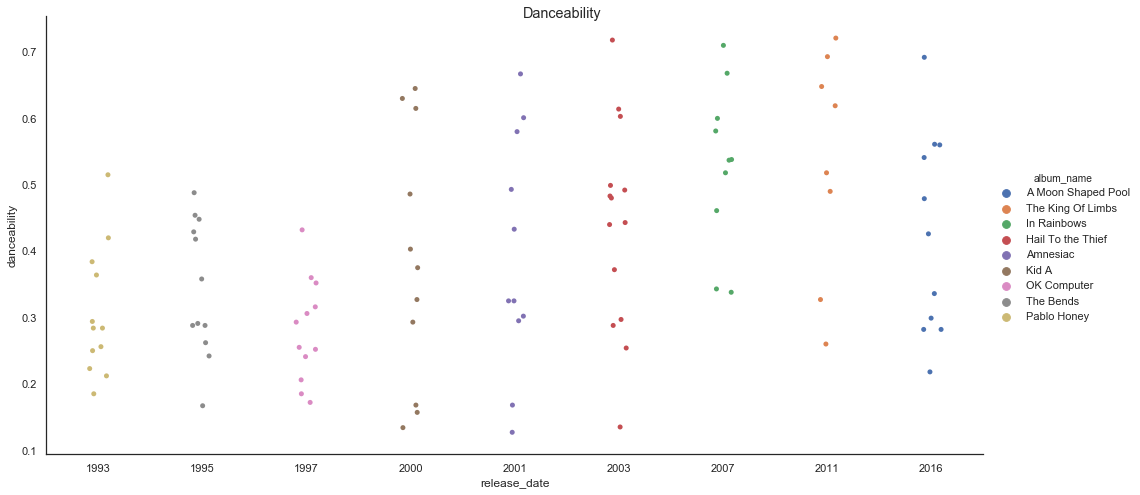

In [255]:
feature = 'danceability'
sns.catplot(x="release_date", y=feature, hue='album_name', data=filtered_df,  height=7, aspect=2)
plt.suptitle(feature.capitalize())
plt.show()

In [256]:
get_n_most_from_feature_by_album(2, feature)

track_name  danceability
album_name                                                                    
A Moon Shaped Pool 29                                  Identikit         0.692
                   26                         Desert Island Disk         0.561
Amnesiac           93   Packt Like Sardines In a Crushed Tin Box         0.667
                   97                           I Might Be Wrong         0.601
Hail To the Thief  82                                 Backdrifts         0.718
                   87                               There, There         0.614
In Rainbows        68                             House Of Cards         0.710
                   65                                 All I Need         0.668
Kid A              120                              Morning Bell         0.645
                   113                                     Kid A         0.630
OK Computer        129                            Fitter Happier         0.432
                   128                              Karma Police         0.360
Pablo Honey        148                                     Creep         0.515
                   157                                    Lurgee         0.420
The Bends          146                  Street Spirit (Fade Out)         0.488
                   138                        Fake Plastic Trees         0.454
The King Of Limbs  57                               Lotus Flower         0.721
                   60                                  Separator         0.693

In [257]:
get_n_tracks_from_feature(10, feature)

,album_name,track_name,danceability
0,The King Of Limbs,Lotus Flower,0.721
1,Hail To the Thief,Backdrifts,0.718
2,In Rainbows,House Of Cards,0.710
3,The King Of Limbs,Separator,0.693
4,A Moon Shaped Pool,Identikit,0.692
5,In Rainbows,All I Need,0.668
6,Amnesiac,Packt Like Sardines In a Crushed Tin Box,0.667
7,The King Of Limbs,Morning Mr Magpie,0.648
8,Kid A,Morning Bell,0.645
9,Kid A,Kid A,0.630


# Valence

**Valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

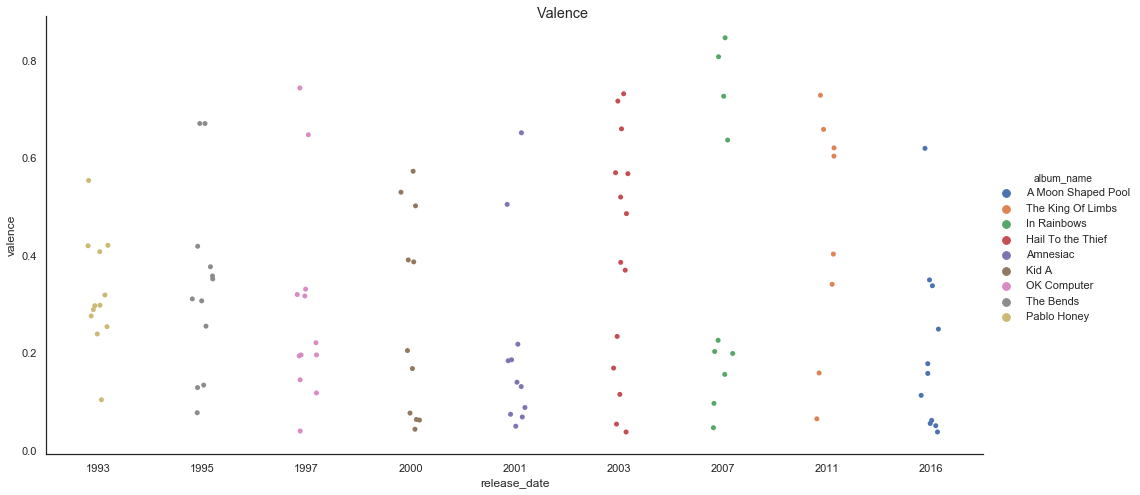

In [258]:
feature = 'valence'
sns.catplot(x="release_date", y=feature, hue='album_name', data=filtered_df,  height=7, aspect=2)
plt.suptitle(feature.capitalize())
plt.show()

In [259]:
get_n_most_from_feature_by_album(2, feature)

track_name  valence
album_name                                                               
A Moon Shaped Pool 23                             Burn the Witch    0.620
                   29                                  Identikit    0.350
Amnesiac           93   Packt Like Sardines In a Crushed Tin Box    0.652
                   97                           I Might Be Wrong    0.505
Hail To the Thief  82                                 Backdrifts    0.732
                   87                               There, There    0.717
In Rainbows        61                                    15 Step    0.847
                   69                  Jigsaw Falling Into Place    0.808
Kid A              117                                Optimistic    0.573
                   119                                 Idioteque    0.530
OK Computer        129                            Fitter Happier    0.744
                   123                                    Airbag    0.648
Pablo Honey        152                    Anyone Can Play Guitar    0.554
                   151                        Thinking About You    0.421
The Bends          142                              My Iron Lung    0.671
                   145                                      Sulk    0.671
The King Of Limbs  56                                      Feral    0.729
                   60                                  Separator    0.659

In [260]:
get_n_tracks_from_feature(10, feature)

,album_name,track_name,valence
0,In Rainbows,15 Step,0.847
1,In Rainbows,Jigsaw Falling Into Place,0.808
2,OK Computer,Fitter Happier,0.744
3,Hail To the Thief,Backdrifts,0.732
4,The King Of Limbs,Feral,0.729
5,In Rainbows,Bodysnatchers,0.727
6,Hail To the Thief,"There, There",0.717
7,The Bends,My Iron Lung,0.671
8,The Bends,Sulk,0.671
9,Hail To the Thief,Go To Sleep,0.660


Well, we all know that Radiohead is a band with a lot of sad songs... So, what is the top 10 sad songs, based on the _valence_ feature?

In [261]:
get_n_tracks_from_feature(10, feature, ascending=True)

,album_name,track_name,valence
0,Hail To the Thief,We Suck Young Blood,0.0378
1,A Moon Shaped Pool,True Love Waits,0.0379
2,OK Computer,The Tourist,0.0398
3,Kid A,Motion Picture Soundtrack,0.0435
4,In Rainbows,Videotape,0.0466
5,Amnesiac,Life In a Glasshouse,0.0497
6,A Moon Shaped Pool,Tinker Tailor Soldier Sailor Rich Man Poor Man...,0.0507
7,Hail To the Thief,Sail To The Moon,0.0540
8,A Moon Shaped Pool,The Numbers,0.0552
9,A Moon Shaped Pool,Glass Eyes,0.0616
